<a href="https://colab.research.google.com/github/ulya1202/NLP/blob/main/Studying_NLP_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

raw_train_set,raw_valid_set,raw_test_set = tfds.load(
    name = 'imdb_reviews',
    split = ["train[:90%]","train[90%:]","test"],
    as_supervised=True
)
tf.random.set_seed(42)
train_set = raw_train_set.shuffle(5000,seed=42).batch(32).prefetch(1)
valid_set = raw_valid_set.batch(32).prefetch(1)
test_set = raw_test_set.batch(32).prefetch(1)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.JLX3TH_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.JLX3TH_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.JLX3TH_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for review, label in raw_train_set.take(4):
  print(review.numpy().decode("utf-8")[:200],"...")
  print("Label:",label.numpy())


This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting  ...
Label: 0
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However  ...
Label: 0
Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do. <br /><br />But come on Hollywood - a Moun ...
Label: 0
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful perf ...
Label: 1


In [ ]:
vocab_size = 1000

text_vec_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size,
                                                   standardize="lower_and_strip_punctuation")
text_vec_layer.adapt(train_set.map(lambda review,label:review))


In [ ]:
text_vec_layer.get_vocabulary()[:50]

['',
 '[UNK]',
 np.str_('the'),
 np.str_('and'),
 np.str_('a'),
 np.str_('of'),
 np.str_('to'),
 np.str_('is'),
 np.str_('in'),
 np.str_('it'),
 np.str_('i'),
 np.str_('this'),
 np.str_('that'),
 np.str_('br'),
 np.str_('was'),
 np.str_('as'),
 np.str_('for'),
 np.str_('with'),
 np.str_('movie'),
 np.str_('but'),
 np.str_('film'),
 np.str_('on'),
 np.str_('not'),
 np.str_('you'),
 np.str_('are'),
 np.str_('his'),
 np.str_('have'),
 np.str_('he'),
 np.str_('be'),
 np.str_('one'),
 np.str_('its'),
 np.str_('at'),
 np.str_('all'),
 np.str_('by'),
 np.str_('an'),
 np.str_('they'),
 np.str_('from'),
 np.str_('who'),
 np.str_('so'),
 np.str_('like'),
 np.str_('her'),
 np.str_('or'),
 np.str_('just'),
 np.str_('about'),
 np.str_('has'),
 np.str_('if'),
 np.str_('out'),
 np.str_('some'),
 np.str_('there'),
 np.str_('what')]

In [ ]:
list(map(str,text_vec_layer.get_vocabulary()[:50]))

['',
 '[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'br',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'you',
 'are',
 'his',
 'have',
 'he',
 'be',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'from',
 'who',
 'so',
 'like',
 'her',
 'or',
 'just',
 'about',
 'has',
 'if',
 'out',
 'some',
 'there',
 'what']

In [ ]:
text_vec_layer(['it was a great movie',
                'it was'])

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[ 9, 14,  4, 86, 18],
       [ 9, 14,  0,  0,  0]])>

In [ ]:
embed_layer = tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=64)
embed_layer(text_vec_layer(['it was a great movie']))

<tf.Tensor: shape=(1, 5, 64), dtype=float32, numpy=
array([[[ 2.60268115e-02, -1.02733485e-02,  3.37602943e-03,
         -1.82926767e-02, -2.47020479e-02, -4.88804951e-02,
          2.71451585e-02,  3.52067016e-02,  4.77752797e-02,
          1.28271841e-02,  8.79146904e-03, -2.98127886e-02,
         -1.80167779e-02, -2.34275460e-02,  3.20134647e-02,
          1.91289224e-02, -4.84151766e-03, -3.84081975e-02,
         -1.19172335e-02, -4.84213233e-05, -3.28062549e-02,
         -4.22244072e-02,  6.08044863e-03, -3.47100869e-02,
          4.22638990e-02,  7.55306333e-03, -1.43798962e-02,
         -3.00671700e-02, -3.47423926e-02,  3.67965214e-02,
         -3.12098619e-02,  1.87567361e-02,  2.81486847e-02,
          1.40132345e-02, -2.74091121e-02, -2.12539360e-03,
         -1.98273901e-02, -3.57831828e-02, -2.94149406e-02,
         -3.77780795e-02,  2.66284868e-03, -4.28154729e-02,
         -4.03235666e-02,  4.26441915e-02, -2.73364540e-02,
          4.46898006e-02,  2.43209861e-02, -8.66

In [ ]:
embed_size = 128
model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Embedding(input_dim = vocab_size,output_dim=embed_size,mask_zero=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer= tf.keras.optimizers.Nadam(learning_rate=1e-3),
    metrics = ['accuracy']
)
model.fit(train_set,validation_data = valid_set,epochs=2)

Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.6472 - loss: 0.6086 - val_accuracy: 0.8344 - val_loss: 0.3872
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.8556 - loss: 0.3414 - val_accuracy: 0.8696 - val_loss: 0.3065


In [ ]:
embedding_weights = model.layers[1].get_weights()[0]

In [ ]:
import numpy as np
np.savetxt("embeddings.tsv",embedding_weights,delimiter="\t")

In [ ]:
vocab = text_vec_layer.get_vocabulary()

with open("metadata.tsv","w",encoding = "utf-8") as f:
  for word in vocab:
    word = word if word.strip()!="" else "<PAD>"
    f.write(f"{word}\n")

#Generating Shakespearean Text Using a Character RNN

In [ ]:
import tensorflow as tf
shakespeare_url = "https://homl.info/shakespeare"

filepath = tf.keras.utils.get_file("shakespeare.txt",shakespeare_url)
with open(filepath) as f:
  shakespeare_text = f.read()

1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(shakespeare_text[:80])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.


In [ ]:
''.join(sorted(set(shakespeare_text.lower())))

"\n !$&',-.3:;?abcdefghijklmnopqrstuvwxyz"

In [ ]:
text_vec_layer  = tf.keras.layers.TextVectorization(split='character',
                                                    standardize = 'lower')#. vergul lazim
text_vec_layer.adapt(shakespeare_text)
encoded = text_vec_layer(shakespeare_text)#-elave listun ichinden cixaririq tex vece gonderririk

In [ ]:
encoded -=2 #unkw ve paddingi sil - qiymet ignore edir onunchun 0-2 ve.s
vocab_size = text_vec_layer.vocabulary_size() - 2
dataset_size = len(encoded)


In [ ]:
dataset_size #listin ichinen cixarmasaq 1 olar

1115394

In [ ]:
#input -> Before we proceed any furthe
#output -> efore we proceed any further

In [ ]:
def to_dataset(sequence , lenght ,seed =None,shuffle = False,batch_size = 32):
  ds = tf.data.Dataset.from_tensor_slices(sequence)
  ds = ds.window(lenght+1,shift=1,drop_remainder = True) #qissa daha suretlidi amma kokhne elaqeler unudulur
  ds = ds.flat_map(lambda window_ds: window_ds.batch(lenght+1)) #hamisini birleshdirir
  if shuffle :
    ds = ds.shuffle(100_000,seed=seed) #batchleri qarishdir
  ds = ds.batch(batch_size)
  return ds.map(lambda window:(window[:,:-1],window[:,1:]))

In [ ]:
lenght = 100
tf.random.set_seed(42)
train_set = to_dataset(encoded[:1_000_000],lenght=lenght,shuffle=True,
                       seed=42)
valid_set = to_dataset(encoded[1_000_000:1_060_000],lenght=lenght)
test_set = to_dataset(encoded[1_060_000:],lenght=lenght)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = vocab_size,output_dim=16), #bir herifi ifade etmek uchun kifayetdi
    tf.keras.layers.GRU(128,return_sequences = True), #y- i return etsin  hamisinda cixir
    tf.keras.layers.Dense(vocab_size,activation="softmax") #her neyron bir herif
])
model.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",
              metrics = ["accuracy"])

model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    "my_shakespeare_model.keras",
    monitor="val_accuracy",
    save_best_only = True)

history = model.fit(train_set,validation_data=valid_set,epochs=1,
                    callbacks=[model_ckpt])

  31244/Unknown 401s 12ms/step - accuracy: 0.5485 - loss: 1.4933

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31247/31247 ━━━━━━━━━━━━━━━━━━━━ 417s 13ms/step - accuracy: 0.5485 - loss: 1.4933 - val_accuracy: 0.5337 - val_loss: 1.6072


In [ ]:
shakespeare_model = tf.keras.Sequential([ #test uchun
    text_vec_layer,
    tf.keras.layers.Lambda(lambda X:X-2), #paddingle baqli pad unk
    model
])

In [ ]:
y_proba = shakespeare_model.predict(tf.constant(["To be or not to b"]))[0,-1] #en axirinci herifi qaytarmisr !!!
y_pred = tf.argmax(y_proba)
text_vec_layer.get_vocabulary()[y_pred+2] #unk ve pad

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


np.str_('e')

#Generating Fake Shakespeare text

In [ ]:
log_probas = tf.math.log([[0.5,0.3,0.2]])
tf.random.categorical(log_probas,num_samples=8)

<tf.Tensor: shape=(1, 8), dtype=int64, numpy=array([[0, 0, 0, 1, 0, 0, 0, 1]])>

In [ ]:
#"Bu log ehtimallardan istifadə et, və 8 dəfə təsadüfi kateqoriya seç"

#Yəni, 0.5 ehtimalla 0, 0.3 ilə 1, 0.2 ilə 2 gələcək.

In [ ]:
shakespeare_model.predict(tf.constant(['hello my dearr']))[0].shape #cumledeki charekterler setirde -- yeni h-dan sonra hansi l dan sonra hansi ve.s --> butun vocabulary uzre

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(14, 39)

In [ ]:
shakespeare_model.predict(tf.constant(['hello my dearr']))[0,-1:]#noqtesizde eyni neticeni verdi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[3.69505249e-02, 2.75135607e-01, 2.76962855e-05, 1.36351194e-02,
        3.04775499e-02, 1.35534242e-01, 2.32875591e-05, 5.54100983e-02,
        2.10383977e-03, 4.07455673e-06, 4.97320257e-02, 2.53603503e-04,
        1.09040855e-04, 2.61573605e-02, 1.83994329e-04, 5.41657768e-02,
        1.11590640e-03, 2.45396625e-02, 2.06100231e-04, 4.77084331e-03,
        1.47981060e-04, 3.30972427e-04, 1.33541116e-05, 2.35887337e-03,
        8.31076704e-07, 1.48155232e-05, 2.57752016e-02, 2.22173974e-01,
        1.06029818e-02, 3.89179611e-03, 2.26366110e-02, 1.50033308e-03,
        7.92848459e-06, 9.41146993e-07, 6.91933155e-06, 1.17855791e-07,
        1.12989778e-08, 5.74992365e-09, 1.53976040e-12]], dtype=float32)

In [ ]:
def next_char(text,temperature):
  text = tf.constant([text])
  y_proba = shakespeare_model.predict(text)[0,-1:]# niye iki noqte
  rescaled_logits = tf.math.log(y_proba)/temperature
  char_id = tf.random.categorical(rescaled_logits,num_samples=1)[0,0]# iki moteroized qurtaramq uchun
  return text_vec_layer.get_vocabulary()[char_id+2] #chartcertid tapidi

In [ ]:
def extent_text(text,chars=50,temperature = 1):
  for _ in range(chars):
    text +=next_char(text,temperature)
  return text

In [ ]:
extent_text('to be or not to be',chars = 100,temperature = 1)

#An Encoder-Decoder Network for Neural Machine Translation

In [ ]:
from pathlib import Path
import tensorflow as tf

url = "https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip"
path = tf.keras.utils.get_file("spa-eng.zip", origin=url, cache_dir="datasets", extract=True)

# Final corrected path
spa_txt_path = Path(path).parent / "spa-eng_extracted" / "spa-eng" / "spa.txt"

# Read the file
text = spa_txt_path.read_text(encoding='utf-8')
print(text[:500])  # Print first 500 characters as a quick check

2638744/2638744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!
Fire!	¡Disparad!
Help!	¡Ayuda!
Help!	¡Socorro! ¡Auxilio!
Help!	¡Auxilio!
Jump!	¡Salta!
Jump.	Salte.
Stop!	¡Parad!
Stop!	¡Para!
Stop!	¡Pare!
Wait!	¡Espera!
Wait.	Esperen.
Go on.	Continúa.
Go on.	Continúe.
Hello!	Hola.
I ran.	Corrí.
I ran.	Corría.
I try.	Lo intento.
I won!	¡He ganado!
Oh no!	¡Oh, no!
Relax.	Tomátelo con soda.
Smile.	Sonríe.
Attack!	¡Al ataque!
Attack!	¡Atacad!
Ge


In [ ]:
import numpy as np

text = text.replace("i","").replace("¿","")
pairs = [line.split('\t')for line in text.splitlines()]
np.random.seed(42)
np.random.shuffle(pairs)
sentence_en ,sentences_es = zip(*pairs)

In [ ]:
pairs

[['How borng!', '¡Qué aburrmento!'],
 ['I love sports.', 'Adoro el deporte.'],
 ['Would you lke to swap jobs?', 'Te gustaría que ntercambemos los trabajos?'],
 ['My mother dd nothng but weep.', 'M madre no hzo nada sno llorar.'],
 ['Croata s n the southeastern part of Europe.',
  'Croaca está en el sudeste de Europa.'],
 ['I have never eaten a mango before.', 'Nunca he comdo un mango.'],
 ['Tell the tax drver to drve faster.',
  'Decle al taxsta que maneje más rápdo.'],
 ['Tom and I work together.', 'Tom y yo trabajamos juntos.'],
 ['I would prefer an honorable death.', 'Preferría una muerte honorable.'],
 ['Tom marred a much younger woman.',
  'Tom se ha casado con una mujer mucho más joven.'],
 ["It couldn't happen to me.", 'A mí no podría pasarme.'],
 ["Tom sn't gong to marry you.", 'Tom no se va a casar contgo.'],
 ["Can you beleve t? He's even lazer than me.",
  'Puedes creerlo? Él es aún más flojo que yo.'],
 ['She has hundreds of books.', 'Ella tene centos de lbros.'],
 ['They f

In [ ]:
for i in range(3):
  print(sentence_en[i],"=>",sentences_es[i])

How borng! => ¡Qué aburrmento!
I love sports. => Adoro el deporte.
Would you lke to swap jobs? => Te gustaría que ntercambemos los trabajos?


In [ ]:

vocab_size=1000 #
max_len=50 #cumle uzunluqunu kes 50 soz

text_vec_layer_en=tf.keras.layers.TextVectorization(
    vocab_size, output_sequence_length=max_len #max
)

text_vec_layer_es=tf.keras.layers.TextVectorization(
    vocab_size, output_sequence_length=max_len
)

text_vec_layer_en.adapt(sentence_en)
text_vec_layer_es.adapt([f'startofesq {s} endofseq' for s in sentences_es])#her cumlenin evvelne ve sona elave edirik enkder hissene y-1 e ggirisn vw cixishda byu


In [ ]:
text_vec_layer_en.get_vocabulary()[:10] #ilk

['',
 '[UNK]',
 np.str_('the'),
 np.str_('i'),
 np.str_('to'),
 np.str_('you'),
 np.str_('tom'),
 np.str_('a'),
 np.str_('s'),
 np.str_('he')]

In [ ]:
text_vec_layer_es.get_vocabulary()[:10] #her cumlenin evveleni start ve end yazildiqi uchun bu tokenler coxdu

['',
 '[UNK]',
 np.str_('startofesq'),
 np.str_('endofseq'),
 np.str_('de'),
 np.str_('que'),
 np.str_('a'),
 np.str_('no'),
 np.str_('tom'),
 np.str_('la')]

In [ ]:
X_train=tf.constant(sentence_en[:100_000])
X_valid=tf.constant(sentence_en[100_000:])

X_train_dec=tf.constant([f'startofseq {s}' for s in sentences_es[:100_000]])
X_valid_dec=tf.constant([f'startofseq {s}' for s in sentences_es[100_000:]])

Y_train=text_vec_layer_es([f'{s} endofseq' for s in sentences_es[:100_000]])
Y_valid=text_vec_layer_es([f'{s} endofseq' for s in sentences_es[100_000:]]) #train vacti

In [ ]:
tf.random.set_seed(42)
encoder_inputs=tf.keras.layers.Input(shape=[], dtype=tf.string)
decoder_inputs=tf.keras.layers.Input(shape=[], dtype=tf.string)

In [ ]:
embed_size=128
encoder_input_ids=text_vec_layer_en(encoder_inputs)
decoder_inputs_ids=text_vec_layer_es(decoder_inputs)#ferli dil

encoder_embedding_layer=tf.keras.layers.Embedding(vocab_size, embed_size,
                                                  mask_zero=True) #0-i ignore edir
decoder_embedding_layer=tf.keras.layers.Embedding(vocab_size, embed_size,
                                                  mask_zero=True)
encoder_embeddings=encoder_embedding_layer(encoder_input_ids)
decoder_embeddings=decoder_embedding_layer(decoder_inputs_ids)

In [ ]:
encoder=tf.keras.layers.LSTM(512, return_state=True)#en axirinci qiyemt cixidsj
encoder_outputs, *encoder_state=encoder(encoder_embeddings) #


In [ ]:
decoder=tf.keras.layers.LSTM(512, return_sequences=True)#!!!!!!!!!
decoder_outputs=decoder(decoder_embeddings, initial_state=encoder_state)

In [ ]:
output_layer=tf.keras.layers.Dense(vocab_size, activation='softmax')
Y_proba=output_layer(decoder_outputs)

In [ ]:
model=tf.keras.Model(inputs=[encoder_inputs,decoder_inputs],
                     outputs=[Y_proba])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

model.fit((X_train, X_train_dec), Y_train, epochs=3,
          validation_data=((X_valid, X_valid_dec), Y_valid))

Epoch 1/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - accuracy: 0.0517 - loss: 3.4965 - val_accuracy: 0.0754 - val_loss: 2.1104
Epoch 2/3
 448/3125 ━━━━━━━━━━━━━━━━━━━━ 55s 21ms/step - accuracy: 0.0763 - loss: 2.0825

KeyboardInterrupt: 

In [ ]:
def translate(sentence_en):
    translation='' #heleki tercume olunmabi

    for word_idx in range(max_len): # 50 defe  # Use max_len instead of max_length

        X=tf.constant([sentence_en]) #encoder
        X_dec=tf.constant(['startofseq'+translation]) #translation

        y_proba=model.predict((X, X_dec))[0, word_idx] #necenci soz

        predicted_word_id=np.argmax(y_proba)
        predicted_word=text_vec_layer_es.get_vocabulary()[predicted_word_id]
        if predicted_word=='endofseq': #50 ye catmamish
            break
        translation+=' '+predicted_word #start of seq birleshmesin deye
    return translation.strip() # Use translation instead of translatin

In [ ]:
translate('i love football')

# Bi

In [ ]:
#biderectionl ancaq encoder uchun olacaq
tf.random.set_seed(42)

encoder=tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(256, return_state=True)#256+256 #Burada return_state=True olduğuna görə LSTM yalnız ən son hidden state və cell state-i geri qaytarır.
)#iki melumat cixirdiC ve a gonderilir, ikidene short ve long yaranir , bunlari bbirleshdirmeliyik ki decodere gondrek axi long ve short ancaq encoderde olur


In [ ]:
#keras klayerde deyihmekolar, call metodu ichinde --> ozumuzdden layer yaratmaliyiq

In [ ]:
class ConcatStates(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
    def call(self, encoder_state):
        return [ tf.concat(encoder_state[::2], axis=-1), #short term (0, 2) # birleshdirirk
                tf.concat(encoder_state[1::2], axis=-1)] #long term (1,3)

encoder_outputs, *encoder_state=encoder(encoder_embeddings) # y-hat , ve (short, long) biidrectionl oldugundan bizde ikidene var
concat_states=ConcatStates()
encoder_state=concat_states(encoder_state)
"""
return seq
output.shape = (32, 10, 256)
→ Yəni hər zaman addımı üçün bir çıxış olur.
Bunun əksi: return_sequences=False → yalnız sonuncu zaman addımı üçün çıxış verir: (32, 256).

🔗 Niyə axis=-1 ilə birləşdiririk?
Birləşdirməni axis=-1 üzrə edirik ki, vektorlar feature ölçüsündə ardıcıl qoşulsun.

Yəni:

Hər biri (batch_size, 256) ölçüsündədirsə,

Birləşmə nəticəsində (batch_size, 512) ölçülü vektor alınır (forward + backward).
""""

In [ ]:
decoder=tf.keras.layers.LSTM(512, return_sequences=True) #her defe soz cixsn
decoder_outputs=decoder(decoder_embeddings, initial_state=encoder_state) #initial state o yazdiqqe bashlanqic encoderden cixan, yuxardaki

output_layer=tf.keras.layers.Dense(vocab_size, activation='softmax')
Y_proba=output_layer(decoder_outputs)

model=tf.keras.Model(inputs=[encoder_inputs, decoder_inputs],
                     outputs=[Y_proba])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

model.fit((X_train, X_train_dec), Y_train, epochs=3,
          validation_data=((X_valid, X_valid_dec), Y_valid))

Epoch 1/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.0647 - loss: 2.8335 - val_accuracy: 0.0888 - val_loss: 1.5607
Epoch 2/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.0923 - loss: 1.4506 - val_accuracy: 0.0946 - val_loss: 1.3460
Epoch 3/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 78s 23ms/step - accuracy: 0.0997 - loss: 1.1793 - val_accuracy: 0.0964 - val_loss: 1.2814


In [ ]:
translate('i like football and also going to beach')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'[UNK] [UNK] y tambén [UNK] a casa'

In [ ]:
#vocab size artitr , epoch artitrmaq lazimdi

# Beam search

In [ ]:
def beam_search(sentence_en, beam_width, verbose=False):
    X = tf.constant([sentence_en])  # encoder input

    X_dec = tf.constant(["startofseq"])  # decoder input

    y_proba = model.predict((X, X_dec))[0, 0]  # first token's probas

    top_k = tf.math.top_k(y_proba, k=beam_width)#! top nechesini isteyirsen yadda saxxlasin
    top_translations = [  # list of best (log_proba, translation)
        (np.log(word_proba), text_vec_layer_es.get_vocabulary()[word_id])
        for word_proba, word_id in zip(top_k.values, top_k.indices)
    ]

    # extra code – displays the top first words in verbose mode
    if verbose:
        print("Top first words:", top_translations)

    for idx in range(1, max_len):
        candidates = []
        for log_proba, translation in top_translations:
            if translation.endswith("endofseq"):
                candidates.append((log_proba, translation))
                continue  # translation is finished, so don't try to extend it
            X = tf.constant([sentence_en])  # encoder input
            X_dec = tf.constant(["startofseq " + translation])  # decoder input
            y_proba = model.predict((X, X_dec))[0, idx]  # last token's proba
            for word_id, word_proba in enumerate(y_proba):
                word = text_vec_layer_es.get_vocabulary()[word_id]
                candidates.append((log_proba + np.log(word_proba),
                                   f"{translation} {word}"))
        top_translations = sorted(candidates, reverse=True)[:beam_width]

        # extra code – displays the top translation so far in verbose mode
        if verbose:
            print("Top translations so far:", top_translations)

        if all([tr.endswith("endofseq") for _, tr in top_translations]):
            return top_translations[0][1].replace("endofseq", "").strip()

In [ ]:
sentence_en='I lovesoccer and also going to the beach'
translate(sentence_en)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


'[UNK] a menudo tambén estoy [UNK] a la playa'

In [ ]:
beam_search(sentence_en, beam_width=3, verbose=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Top first words: [(np.float32(-0.55047715), '[UNK]'), (np.float32(-1.8600417), np.str_('yo')), (np.float32(-2.1180027), np.str_('me'))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Top translations so far: [(np.float32(-1.7475138), '[UNK] a'), (np.float32(-1.7902737), '[UNK] y'), (np.float32(-2.2266943), 'me [UNK]')]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Top translations so far: [(np.float32(-2.8334086), '[UNK] a menudo'), (np.float32(-2.9240038), '[UNK] y [UNK]'), (np.float32(-3.272038), 'me [UNK] y')]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Top translations so far: [(np.float32(-4.158637), 'me [UNK] y [UNK]'), (np.float32(-4.194074), '[UNK] y [UNK] [UNK]'), (np.float32(-4.250258), '[UNK] y [UNK] a')]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34m

'[UNK] y [UNK] [UNK] a la playa'

#Attention Mechanism

In [ ]:
tf.random.set_seed(42)

encoder_inputs=tf.keras.layers.Input(shape=[], dtype=tf.string)
decoder_inputs=tf.keras.layers.Input(shape=[], dtype=tf.string)

In [ ]:
embed_size=128

encoder_input_ids=text_vec_layer_en(encoder_inputs)
decoder_input_ids=text_vec_layer_es(decoder_inputs)

encoder_embedding_layer=tf.keras.layers.Embedding(vocab_size,
                                                  output_dim=embed_size,)
                                                #   mask_zero=True)


decoder_embedding_layer=tf.keras.layers.Embedding(vocab_size,
                                                  output_dim=embed_size,)
                                                #   mask_zero=True)

encoder_embeddings=encoder_embedding_layer(encoder_input_ids)
decoder_embeddings=decoder_embedding_layer(decoder_input_ids)

In [ ]:
encoder=tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(256, return_sequences=True, return_state=True)
)
encoder_outputs, *encoder_state=encoder(encoder_embeddings)
encoder_state=concat_states(encoder_state)

In [ ]:
decoder=tf.keras.layers.LSTM(512, return_sequences=True)
decoder_outputs=decoder(decoder_embeddings, initial_state=encoder_state)

In [ ]:
attention_layer=tf.keras.layers.Attention() #additive attention layer
attention_outputs=attention_layer([decoder_outputs, encoder_outputs]) #decoder hidden state

output_layer=tf.keras.layers.Dense(vocab_size, activation='softmax')

Y_proba=output_layer(attention_outputs)

In [ ]:
model=tf.keras.Model(inputs=[encoder_inputs, decoder_inputs],
                     outputs=[Y_proba])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
model.fit((X_train, X_train_dec), Y_train, epochs=3,
          validation_data=((X_valid, X_valid_dec), Y_valid)) #

Epoch 1/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 98s 30ms/step - accuracy: 0.8956 - loss: 0.6547 - val_accuracy: 0.9255 - val_loss: 0.3587
Epoch 2/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 136s 28ms/step - accuracy: 0.9291 - loss: 0.3304 - val_accuracy: 0.9396 - val_loss: 0.2654
Epoch 3/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 142s 28ms/step - accuracy: 0.9420 - loss: 0.2506 - val_accuracy: 0.9464 - val_loss: 0.2287


In [ ]:
#maski yaxsi oturmur attention, ignor elemir zerolari
#Additive attention
#dot product

In [ ]:
#GRU, LSTM< lementization, se,

# transf

In [ ]:
import tensorflow as tf

In [ ]:
vocab_size=15_000
max_length=50
embed_size=128

num_heads=5
ff_dim=512 #feedfoerwad



### Inputs

In [ ]:
#Input layers
encoder_inputs=tf.keras.Input(shape=(None,), dtype=tf.int32, name='encoder_inputs')
decoder_inputs=tf.keras.Input(shape=(None,), dtype=tf.int32, name='decoder_inputs')
#Embedding layers

encoder_embedding_layer=tf.keras.layers.Embedding(vocab_size,
                                                  output_dim=embed_size, # Changed output_dim to embed_size
                                                  mask_zero=True)

decoder_embedding_layer=tf.keras.layers.Embedding(vocab_size,
                                                  output_dim=embed_size, # Changed output_dim to embed_size
                                                  mask_zero=True)

encoder_embeddings=encoder_embedding_layer(encoder_inputs)
decoder_embeddings=decoder_embedding_layer(decoder_inputs)

#positional embeddings
pos_embedding_layer=tf.keras.layers.Embedding(max_length, embed_size) #yeni  soz sayi cumlede, embed_ize eyni toplayacam
positions_encoder=tf.keras.layers.Lambda(lambda x: tf.range(start=0,limit=tf.shape(x)[1],
                                                            delta=1))(encoder_inputs) #encoder_inputs=1  batch szo
positions_decoder=tf.keras.layers.Lambda(lambda x: tf.range(start=0,limit=tf.shape(x)[1],
                                                            delta=1))(decoder_inputs)
pos_embed_enc=pos_embedding_layer(positions_encoder)  #1-50 ye kimi olanlarin embedingin duzelt
pos_embed_dec=pos_embedding_layer(positions_encoder)

#add tokens and positional embedding
encoder_embed=encoder_embeddings+pos_embed_enc
decoder_embed=decoder_embeddings+pos_embed_dec # Fixed: Using decoder_embeddings instead of encoder_embeddings

### Encoder

In [ ]:
#encoder self_attention

encoder_attention=tf.keras.layers.MultiHeadAttention(num_heads=num_heads,
                                                     key_dim=embed_size)(encoder_embed, encoder_embed) #query embed key embed_encoder oz uzerinde value de ozune beraberdi sselfde ozundengelir hamisi amm crossda ferqi yerde
encoder_attention=tf.keras.layers.LayerNormalization( epsilon=1e-6)(encoder_embed+encoder_attention) #multiden sve skip

In [ ]:
#layer axis uzerinden setir uzerinden normallashdiri , obirisi sutun uzerinden

In [ ]:
#Encoder FeedForward
encoder_ff=tf.keras.layers.Dense(ff_dim, activation='relu')(encoder_attention)
encoder_ff=tf.keras.layers.Dense(embed_size)(encoder_ff) #bootneck , ve daha genish hissesi
encoder_outputs=tf.keras.layers.LayerNormalization(epsilon=1e-6)(encoder_attention+encoder_ff)

### Decoder

In [ ]:
#Decoder self-attention
causal_mask=tf.keras.layers.Lambda(
    lambda x: tf.linalg.band_part(tf.ones((tf.shape(x)[1], tf.shape(x)[1])),-1,0))(decoder_inputs)
decoder_attention=tf.keras.layers.MultiHeadAttention(num_heads=num_heads,
                                                         key_dim=embed_size)(decoder_embed, decoder_embed, attention_mask=causal_mask)
decoder_attention=tf.keras.layers.LayerNormalization(epsilon=1e-6)(decoder_embed+decoder_attention)

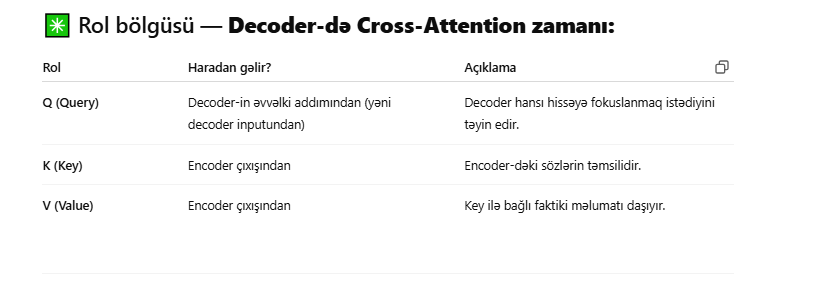

In [ ]:
#Decoder Encodrer cross attention
cross_attention=tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_size)(decoder_attention,
                                                                                            encoder_outputs, encoder_outputs) #decoder key-encoder
decoder_cross=tf.keras.layers.LayerNormalization(epsilon=1e-6)(decoder_attention+cross_attention)


In [ ]:
#Decoder FeedForwad
decoder_ff=tf.keras.layers.Dense(ff_dim, activation='relu')(decoder_cross)
decoder_ff=tf.keras.layers.Dense(embed_size)(decoder_ff)
decoder_outputs=tf.keras.layers.LayerNormalization(epsilon=1e-6)(decoder_cross+decoder_ff)



### Output

In [ ]:
#Output--Final
output_logits=tf.keras.layers.Dense(vocab_size, activation='softmax')(decoder_outputs)
transformer=tf.keras.Model(inputs=[encoder_inputs, decoder_inputs], outputs=output_logits)

In [ ]:
transformer.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='nadam',
    metrics=['accuracy']
)

### TextVec

In [ ]:
vocab_size=15_000
max_length=50

text_vec_layer_en=tf.keras.layers.TextVectorization(vocab_size, output_sequence_length=max_length,
                                                    pad_to_max_tokens=True)
text_vec_layer_es=tf.keras.layers.TextVectorization(
    vocab_size, output_sequence_length=max_length, pad_to_max_tokens=True
)

In [ ]:
text_vec_layer_en.adapt(sentence_en)
text_vec_layer_es.adapt([f'startofseq {s} endofseq' for s in sentences_es])

In [ ]:
X_train_padded=tf.keras.preprocessing.sequence.pad_sequences(
    text_vec_layer_en(X_train).numpy(), padding='post', maxlen=max_length)

X_train_dec_padded=tf.keras.preprocessing.sequence.pad_sequences(
    text_vec_layer_es(X_train_dec).numpy(), padding='post', maxlen=max_length)

X_valid_padded=tf.keras.preprocessing.sequence.pad_sequences(
    text_vec_layer_en(X_valid).numpy(), padding='post', maxlen=max_length)

X_valid_dec_padded=tf.keras.preprocessing.sequence.pad_sequences(
    text_vec_layer_es(X_valid_dec).numpy(), padding='post', maxlen=max_length)

X_train_padded=tf.constant(X_train_padded)
X_train_dec_padded=tf.constant(X_train_dec_padded)
X_valid_padded=tf.constant(X_valid_padded)
X_valid_dec_padded=tf.constant(X_valid_dec_padded)

transformer.fit(
    (X_train_padded, X_train_dec_padded),
    Y_train,
    epochs=5,
    validation_data=((X_valid_padded, X_valid_dec_padded), Y_valid)
)


Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9661 - loss: 0.1331 - val_accuracy: 0.9607 - val_loss: 0.1637
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.9703 - loss: 0.1134 - val_accuracy: 0.9612 - val_loss: 0.1663
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9732 - loss: 0.1000 - val_accuracy: 0.9613 - val_loss: 0.1688
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9753 - loss: 0.0900 - val_accuracy: 0.9614 - val_loss: 0.1704
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9772 - loss: 0.0818 - val_accuracy: 0.9613 - val_loss: 0.1774


In [ ]:
import numpy as np

def translate(sentence_en):

    X = text_vec_layer_en(tf.constant([sentence_en]))
    X = tf.keras.preprocessing.sequence.pad_sequences(X.numpy(), padding="post", maxlen=max_length)


    start_token = text_vec_layer_es(['startofseq'])[0][0]
    end_token = text_vec_layer_es(['endofseq'])[0][0]


    decoder_input = [start_token]

    for _ in range(max_length):
        decoder_input_padded = tf.keras.preprocessing.sequence.pad_sequences(
            [decoder_input], maxlen=max_length, padding="post"
        )

        y_proba = transformer.predict((X, decoder_input_padded), verbose=0)[0, len(decoder_input)-1]
        predicted_word_id = np.argmax(y_proba)

        if predicted_word_id == end_token:
            break

        decoder_input.append(predicted_word_id)


    vocab = text_vec_layer_es.get_vocabulary()
    translated_words = [vocab[token] for token in decoder_input[1:]]

    return ' '.join(translated_words)